In [26]:
import pandas as pd
from datetime import datetime
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model  import ARIMA
from statsmodels.tsa.stattools import adfuller 
from datetime import datetime
from datetime import timedelta

In [6]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [7]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])

In [8]:
series = pd.read_csv('catfish.csv', parse_dates= [0], index_col=0, date_parser=parser)

C:\Users\Gaurav Lute\AppData\Local\Temp\ipykernel_23352\3396766971.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('catfish.csv', parse_dates= [0], index_col=0, date_parser=parser)


In [10]:
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]

In [13]:
series_1 = series.diff().dropna()

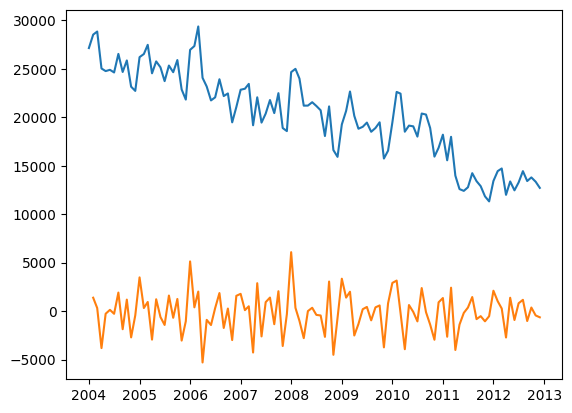

In [16]:
plt.plot(series)
plt.plot(series_1)

In [17]:
series_2 = series_1.diff().dropna()

In [18]:
perform_adf_test(series_2)

ADF Statistics: -7.162321
p-value: 0.000000


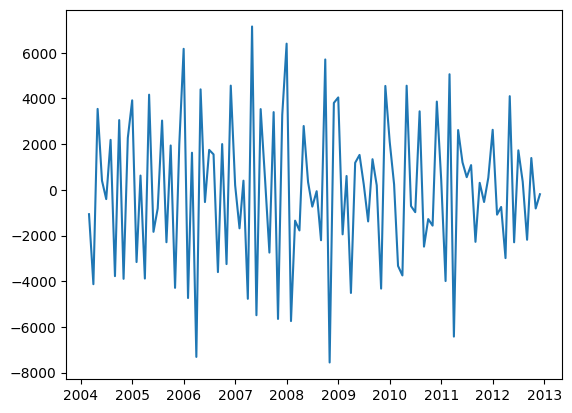

In [19]:
plt.plot(series_2)

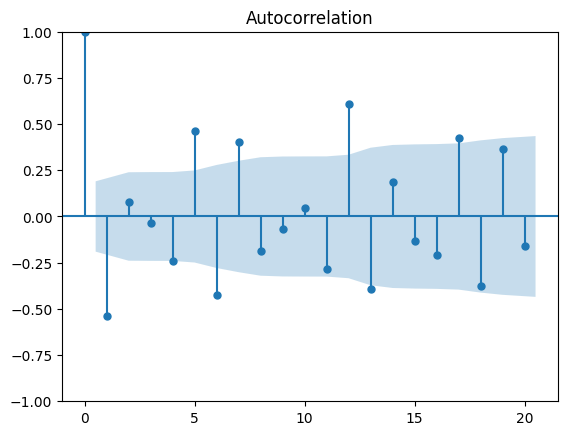

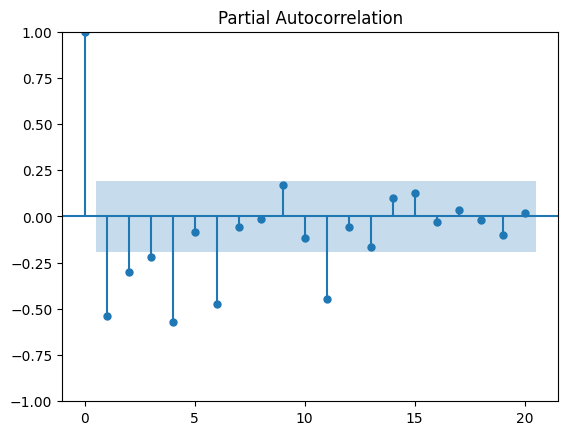

In [22]:
plot_acf(series_2, lags=20)
plot_pacf(series_2, lags=20)
plt.show()

In [27]:
ar_orders = [1, 2, 3]
ma_orders = [5, 6, 7]
fitted_model_dict = {}

for ar_order in ar_orders:
    for ma_order in ma_orders:
        # Create ARMA(p,q) model
        arma_model = ARIMA(series_2, order=(ar_order, 0, ma_order))
        arma_model_fit = arma_model.fit()
        fitted_model_dict[(ar_order, ma_order)] = arma_model_fit

c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

In [28]:
fitted_model_dict

{(1, 5): <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2ccf5623680>,
 (1, 6): <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2ccf572e4b0>,
 (1, 7): <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2ccf572fec0>,
 (2, 5): <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2ccf5732a20>,
 (2, 6): <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2ccf57b4e30>,
 (2, 7): <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2ccf57b67b0>,
 (3, 5): <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2ccf57b7b30>,
 (3, 6): <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2ccf5730f50>,
 (3, 7): <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x2ccf57ba420>}

In [39]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

p_values = range(1, 3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series_2, order=(p, 0, q))
    arma_model_fit = arma_model.fit()
    
    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic
    
    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

# Print AIC and BIC scores for each combination

c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')

ARMA(1,1) - AIC: 1925.1019194603982, BIC: 1935.7556758368464
ARMA(1,2) - AIC: 1929.6905929279972, BIC: 1943.0077883985575
ARMA(2,1) - AIC: 1924.1559573663183, BIC: 1937.4731528368786
ARMA(2,2) - AIC: 1921.7776263634792, BIC: 1937.7582609281515


In [44]:
train_end = datetime(2011, 12, 1)
test_end = datetime(2012, 12, 1)

train_data = series_2[:train_end]
test_data = series_2[train_end + timedelta(days=1):test_end]

In [48]:
train_data.shape , test_data.shape

((94, 1), (12, 1))

In [49]:
model = ARIMA(train_data, order=(2,1,2))

In [50]:
model_fit = model.fit()

c:\Users\Gaurav Lute\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [51]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   94
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -864.804
Date:                Sun, 18 May 2025   AIC                           1739.608
Time:                        19:46:40   BIC                           1752.271
Sample:                    03-01-2004   HQIC                          1744.721
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3752      0.101    -13.655      0.000      -1.573      -1.178
ar.L2         -0.6232      0.095     -6.561      0.000      -0.809      -0.437
ma.L1         -0.1632      0.159     -1.025      0.3

In [55]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [58]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

In [61]:
predictions

2012-01-01   -438.581169
2012-02-01    205.147073
2012-03-01    -77.746741
2012-04-01    -89.872661
2012-05-01    103.096203
2012-06-01   -154.715480
2012-07-01     79.569707
2012-08-01    -81.953469
2012-09-01     -5.830459
2012-10-01     -9.856009
2012-11-01    -51.758378
2012-12-01      8.373858
Freq: MS, Name: predicted_mean, dtype: float64

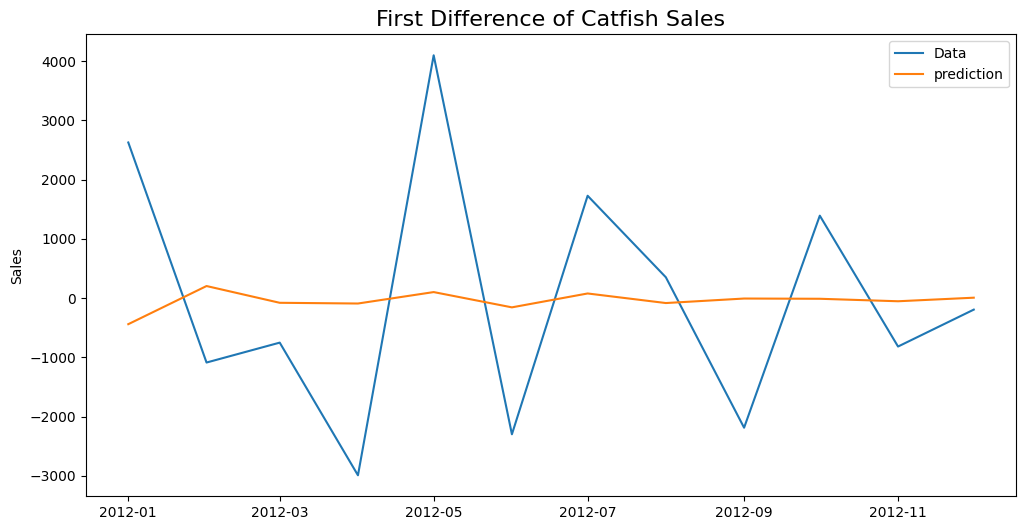

In [71]:
plt.figure(figsize=(12, 6))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'prediction'), fontsize = 10)
plt.title('First Difference of Catfish Sales', fontsize = 16)
plt.ylabel('Sales', fontsize = 10)

plt.show()

In [80]:
def invert_diff(last_actual, differences):
    inverted_values = []
    last_observation = last_actual
    for diff in differences:
        inverted_value = last_observation + diff
        inverted_values.append(inverted_value)
        last_observation = inverted_value
    return inverted_values

In [ ]:
actual_values = pd.Series([100, 105, 110, 115, 120])

# Sample differenced data (assuming first order differencing)
differenced_data = pd.Series([5,5,5,5])


In [ ]:
actual_values = pd.Series([100, 105, 110, 115, 120])
actual_values.iloc[-1]

np.int64(120)

In [81]:
invert_diff(actual_values.iloc[-1],differenced_data)


[np.int64(125), np.int64(130), np.int64(135), np.int64(140)]